In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import os

In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
data= pd.read_excel('../../data/May 13.xls')
data

,id,Company,Index,Year,CashRatio,EBIT,EBITDA,GrossProfitMargin,EBITDARatio,EBITRatio,...,FixedAssets_w,cashholding,cashholding_w,Tangibility,Tangibility_w,ROA,ROE,ROA_w,ROE_w,_merge
0,A32,Công ty 32,UPCoM,2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
1,A32,Công ty 32,UPCoM,2007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
2,A32,Công ty 32,UPCoM,2008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
3,A32,Công ty 32,UPCoM,2009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
4,A32,Công ty 32,UPCoM,2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,YTC,XNK Y tế TP.HCM,UPCoM,2018,0.08,3.617160e+10,4.021374e+10,0.1744,0.0760,0.0683,...,4.814777e+10,0.050601,0.050601,0.062617,0.062617,0.047042,0.640009,0.047042,0.640009,Matched (3)
26625,YTC,XNK Y tế TP.HCM,UPCoM,2019,0.21,3.319102e+10,3.700330e+10,0.1836,0.0726,0.0651,...,5.160008e+10,0.065683,0.065683,0.068599,0.068599,0.044125,0.554094,0.044125,0.554094,Matched (3)
26626,YTC,XNK Y tế TP.HCM,UPCoM,2020,0.03,-1.965803e+10,-1.455882e+10,0.0861,-0.0257,-0.0347,...,5.516760e+10,0.012319,0.012319,0.055415,0.055415,-0.019746,-1.460577,-0.019746,-0.618672,Matched (3)
26627,YTC,XNK Y tế TP.HCM,UPCoM,2021,0.02,9.693024e+08,5.319168e+09,0.0868,0.0088,0.0016,...,5.406539e+10,0.017190,0.017190,0.069243,0.069243,0.001241,0.044573,0.001241,0.044573,Matched (3)


In [4]:
for i in data.columns:
    print(i)

id
Company
Index
Year
CashRatio
EBIT
EBITDA
GrossProfitMargin
EBITDARatio
EBITRatio
QuickRatio
CurrentRatio
LongDetboverOE
LongDebtoverTA
TotalDebtoverOE
TotalDebtoverTA
ShortDebtoverOE
ShortDebtoverTA
IAoverTA
TAoverOE
EBITDAoverShortDebtandExpenses
EBTMargin
NetProfitMarginRatio
TotalAssetTurnover
TotalEquityRatio
Tỷsuấtlợinhuậntừkinhdoanh
LNSTCFODoanhthu
Giátrịcổphiếu
TotalRevenue
SalesDeductions
NetRevenue
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
IncomeAfterDefTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
AllowanceDeclineInSec
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
RelatedPartiesReceivables
ConstructionReceivables
Sho

In [5]:
# data['ResearchDevFund_ratio']=data.ResearchDevFund/data.TotalRevenue
# data['SciTechFund_ratio']=data.SciTechFund/data.TotalRevenue
# # Tính ROA
# data['ROA'] = data['IncomeAfterDefTax'] / data['TOTALASSETS']

# # Tính ROE
# data['ROE'] = data['IncomeAfterDefTax'] / data['OWNERSEQUITY']
# # data['Intangible Assets']=data['CostIntanFA']/data['TOTALASSETS']
# # data['Intangible Assets1']=data['AccDepIntanFA']/data['TOTALASSETS']
# # data['IAoverTA']
# # data['Firmsize_w']=np.log(data['TOTALASSETS'])
# data['T.Debt']=data['TotalDebtoverOE']/data['TOTALASSETS']
# data['T_Debt1']=data['TotalDebtoverTA']/data['TOTALASSETS']
# data

In [6]:
w_cols=['SciTechRatio_w','RandDRatio_w','TotalDebtoverTotalAssets_w','IAoverTA_w','TotalDebtoverTA_w','CashRatio_w','Firmsize_w','SciTechFund_w','ResearchDevFund_w','FixedAssets_w','cashholding','cashholding_w','Tangibility_w','ROA_w','ROE_w',]

In [7]:
df = data[w_cols]
df

,SciTechRatio_w,RandDRatio_w,TotalDebtoverTotalAssets_w,IAoverTA_w,TotalDebtoverTA_w,CashRatio_w,Firmsize_w,SciTechFund_w,ResearchDevFund_w,FixedAssets_w,cashholding,cashholding_w,Tangibility_w,ROA_w,ROE_w
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,0.0,0.026655,0.45,0.00,0.45,0.08,27.368263,0.0,2.049601e+10,4.814777e+10,0.050601,0.050601,0.062617,0.047042,0.640009
26625,0.0,0.030263,0.37,0.00,0.37,0.21,27.346266,0.0,2.276410e+10,5.160008e+10,0.065683,0.065683,0.068599,0.044125,0.554094
26626,0.0,0.022866,0.23,0.00,0.23,0.03,27.626545,0.0,2.276410e+10,5.516760e+10,0.012319,0.012319,0.055415,-0.019746,-0.618672
26627,0.0,0.000000,0.28,0.01,0.28,0.02,27.383589,0.0,0.000000e+00,5.406539e+10,0.017190,0.017190,0.069243,0.001241,0.044573


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26629 entries, 0 to 26628
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SciTechRatio_w              19955 non-null  float64
 1   RandDRatio_w                19944 non-null  float64
 2   TotalDebtoverTotalAssets_w  20741 non-null  float64
 3   IAoverTA_w                  20849 non-null  float64
 4   TotalDebtoverTA_w           20741 non-null  float64
 5   CashRatio_w                 20727 non-null  float64
 6   Firmsize_w                  19976 non-null  float64
 7   SciTechFund_w               19959 non-null  float64
 8   ResearchDevFund_w           19948 non-null  float64
 9   FixedAssets_w               19979 non-null  float64
 10  cashholding                 19975 non-null  float64
 11  cashholding_w               19975 non-null  float64
 12  Tangibility_w               19975 non-null  float64
 13  ROA_w                       198

In [9]:
df.describe()

,SciTechRatio_w,RandDRatio_w,TotalDebtoverTotalAssets_w,IAoverTA_w,TotalDebtoverTA_w,CashRatio_w,Firmsize_w,SciTechFund_w,ResearchDevFund_w,FixedAssets_w,cashholding,cashholding_w,Tangibility_w,ROA_w,ROE_w
count,19955.000000,19944.000000,20741.000000,20849.000000,20741.000000,20727.000000,19976.000000,1.995900e+04,1.994800e+04,1.997900e+04,19975.000000,19975.000000,19975.000000,19835.000000,19826.000000
mean,0.000204,0.044979,0.218529,0.002037,0.218529,0.577180,26.823897,2.775332e+08,4.328418e+10,4.608941e+11,0.051123,0.050167,0.271057,0.062018,0.154002
std,0.001216,0.067836,0.211974,0.009674,0.211974,1.499752,1.541666,1.791388e+09,1.285507e+11,1.440077e+12,0.067176,0.060232,0.234986,0.081134,0.201798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.668734,0.000000e+00,0.000000e+00,6.097837e+06,0.000000,0.000375,0.000032,-0.212303,-0.618672
25%,0.000000,0.002381,0.010000,0.000000,0.010000,0.050000,25.766240,0.000000e+00,8.032081e+08,2.008549e+10,0.012204,0.012204,0.081791,0.016736,0.040284
50%,0.000000,0.017476,0.170000,0.000000,0.170000,0.160000,26.688649,0.000000e+00,6.512920e+09,6.552022e+10,0.030172,0.030172,0.205296,0.052580,0.133886
75%,0.000000,0.056805,0.360000,0.000000,0.360000,0.490000,27.733355,0.000000e+00,2.461194e+10,2.415835e+11,0.063946,0.063946,0.403818,0.099919,0.247876
max,0.009801,0.355467,0.860000,0.070000,0.860000,14.190000,32.382339,1.536171e+10,9.418472e+11,1.081110e+13,0.999930,0.365875,0.906662,0.332130,0.875624


In [10]:
df.drop_duplicates(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3976\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
len(df)

19995

In [12]:
# Thay thế giá trị inf bằng NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Loại bỏ các dòng chứa NaN
# data.dropna(axis=0, how='any', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3976\3341857814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [13]:
len(data)

26629

In [14]:
change_category = list((df.select_dtypes('object')).columns)
change_category

[]

In [15]:
df[change_category]=df[change_category].astype('category')
df.dtypes

SciTechRatio_w                float64
RandDRatio_w                  float64
TotalDebtoverTotalAssets_w    float64
IAoverTA_w                    float64
TotalDebtoverTA_w             float64
CashRatio_w                   float64
Firmsize_w                    float64
SciTechFund_w                 float64
ResearchDevFund_w             float64
FixedAssets_w                 float64
cashholding                   float64
cashholding_w                 float64
Tangibility_w                 float64
ROA_w                         float64
ROE_w                         float64
dtype: object

In [16]:
category_columns=list((df.select_dtypes('category')).columns)
numeric_columns=list((df.select_dtypes('number')).columns)

In [17]:
len(df)

19995

In [18]:
df.dropna(inplace=True)
len(df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3976\2888176961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


19777

In [19]:
df.isnull().sum()

SciTechRatio_w                0
RandDRatio_w                  0
TotalDebtoverTotalAssets_w    0
IAoverTA_w                    0
TotalDebtoverTA_w             0
CashRatio_w                   0
Firmsize_w                    0
SciTechFund_w                 0
ResearchDevFund_w             0
FixedAssets_w                 0
cashholding                   0
cashholding_w                 0
Tangibility_w                 0
ROA_w                         0
ROE_w                         0
dtype: int64

In [20]:
# from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

# label_encoders = {}
# # for column in category_columns:
# #     label_encoder = LabelEncoder()
# #     df[column] = label_encoder.fit_transform(df[column])
# #     label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

# scaler = StandardScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# df

In [21]:
correl=df.corr()
correl

,SciTechRatio_w,RandDRatio_w,TotalDebtoverTotalAssets_w,IAoverTA_w,TotalDebtoverTA_w,CashRatio_w,Firmsize_w,SciTechFund_w,ResearchDevFund_w,FixedAssets_w,cashholding,cashholding_w,Tangibility_w,ROA_w,ROE_w
SciTechRatio_w,1.000000,0.075507,-0.053105,-0.007318,-0.053105,-0.004796,0.079083,0.733222,0.155480,0.106347,-0.000015,0.002116,0.031235,0.062496,0.028022
RandDRatio_w,0.075507,1.000000,-0.225131,0.039752,-0.225131,0.090741,-0.135846,0.075208,0.367011,-0.060179,0.081193,0.090672,-0.032002,0.155319,-0.010323
TotalDebtoverTotalAssets_w,-0.053105,-0.225131,1.000000,-0.027324,1.000000,-0.265724,0.273243,-0.025395,-0.020367,0.198876,-0.205330,-0.215377,0.283768,-0.144635,0.152368
IAoverTA_w,-0.007318,0.039752,-0.027324,1.000000,-0.027324,-0.011686,0.058105,-0.002127,0.037219,0.049761,0.003238,0.003462,-0.009981,-0.005253,-0.042299
TotalDebtoverTA_w,-0.053105,-0.225131,1.000000,-0.027324,1.000000,-0.265724,0.273243,-0.025395,-0.020367,0.198876,-0.205330,-0.215377,0.283768,-0.144635,0.152368
CashRatio_w,-0.004796,0.090741,-0.265724,-0.011686,-0.265724,1.000000,-0.127362,-0.005424,0.002666,-0.042977,0.181790,0.162741,-0.037068,0.057995,-0.072123
Firmsize_w,0.079083,-0.135846,0.273243,0.058105,0.273243,-0.127362,1.000000,0.225540,0.448238,0.584637,-0.198104,-0.204063,0.024658,0.004597,0.078963
SciTechFund_w,0.733222,0.075208,-0.025395,-0.002127,-0.025395,-0.005424,0.225540,1.000000,0.347348,0.296378,-0.021333,-0.021364,0.045318,0.063030,0.026454
ResearchDevFund_w,0.155480,0.367011,-0.020367,0.037219,-0.020367,0.002666,0.448238,0.347348,1.000000,0.481619,-0.032248,-0.031562,0.020072,0.089495,0.018588
FixedAssets_w,0.106347,-0.060179,0.198876,0.049761,0.198876,-0.042977,0.584637,0.296378,0.481619,1.000000,-0.082581,-0.086718,0.247184,0.019387,0.029827


In [22]:
df.columns
train=df

In [23]:
X = train.drop(columns=['ROA_w'])
y = train['ROA_w']


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# # Giả sử df là DataFrame của bạn, chứa cả biến độc lập và biến mục tiêu
# # Xác định X là ma trận đặc trưng và y là vector biến mục tiêu
# X = df.drop(columns=['target_column'])
# y = df['target_column']

# Sử dụng mô hình hồi quy tuyến tính
model = LinearRegression()

# Chọn số lượng đặc trưng tối ưu bằng cách chạy RFE
# Ở đây, chúng ta chọn số lượng đặc trưng tối ưu là 5, bạn có thể thay đổi giá trị này tùy theo yêu cầu
rfe = RFE(model, n_features_to_select=5)

# Fit RFE trên dữ liệu
rfe.fit(X, y)

# In ra các đặc trưng được chọn và hạng của chúng
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Rank': rfe.ranking_})
print(selected_features)


                       Feature  Selected  Rank
0               SciTechRatio_w      True     1
1                 RandDRatio_w      True     1
2   TotalDebtoverTotalAssets_w      True     1
3                   IAoverTA_w     False     2
4            TotalDebtoverTA_w      True     1
5                  CashRatio_w     False     7
6                   Firmsize_w     False     6
7                SciTechFund_w     False     8
8            ResearchDevFund_w     False     9
9                FixedAssets_w     False    10
10                 cashholding     False     4
11               cashholding_w     False     3
12               Tangibility_w     False     5
13                       ROE_w      True     1


In [25]:
X=X[['SciTechRatio_w','RandDRatio_w','TotalDebtoverTotalAssets_w','TotalDebtoverTA_w']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(15821, 4) (3956, 4)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.006100667336357882
R^2 Score: 0.046007328128814806


In [28]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred_linear.shape}")

X_test shape: (3956, 4)
y_test shape: (3956,)
y_pred shape: (3956,)


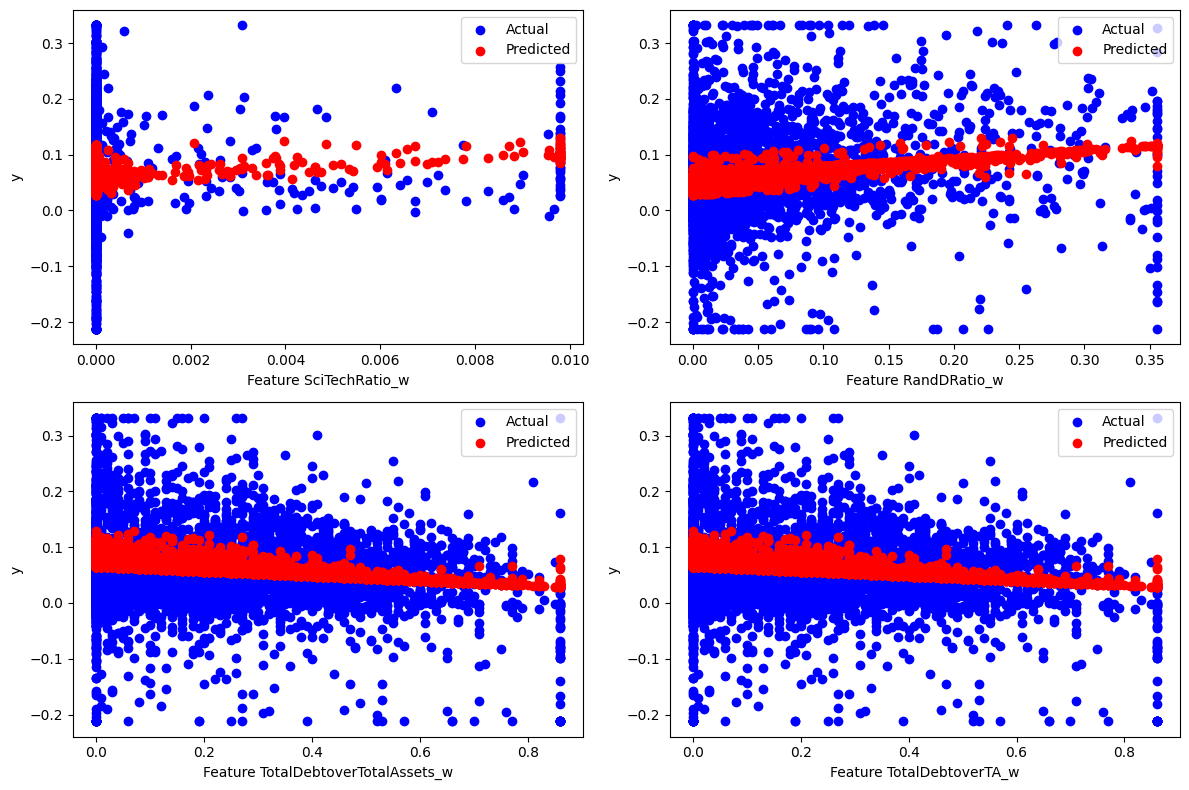

In [29]:
# Hiển thị kết quả dự đoán so với giá trị thực tế
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho tất cả 4 đặc trưng
# Đảm bảo X_test là NumPy array
X_test = np.array(X_test)

# Vẽ biểu đồ cho tất cả 4 đặc trưng
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_linear, color='red', label='Predicted')
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def analyze_OLS(x,y):

    
    x = sm.add_constant(x)  # Thêm hệ số chặn vào dữ liệu

    # x.dropna(inplace=True)
    # y.dropna(inplace=True)
    # print(x.isnull().sum(),x.shape)

    # x['intercept']=const

  
    model = sm.OLS(y, x,hasconst=True)
    results = model.fit()
    summary = results.summary()
    # print(summary)
    return summary


In [31]:
print(analyze_OLS(X,y))

                            OLS Regression Results                            
Dep. Variable:                  ROA_w   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     267.3
Date:                Sun, 19 May 2024   Prob (F-statistic):          4.27e-170
Time:                        15:14:49   Log-Likelihood:                 22028.
No. Observations:               19777   AIC:                        -4.405e+04
Df Residuals:                   19773   BIC:                        -4.402e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [32]:
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [33]:
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [34]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression - Mean Squared Error: {mse_ridge}, R^2 Score: {r2_ridge}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}, R^2 Score: {r2_lasso}")

Ridge Regression - Mean Squared Error: 0.006107442130444736, R^2 Score: 0.04494791879603954
Lasso Regression - Mean Squared Error: 0.006398823287273155, R^2 Score: -0.000616848631783018


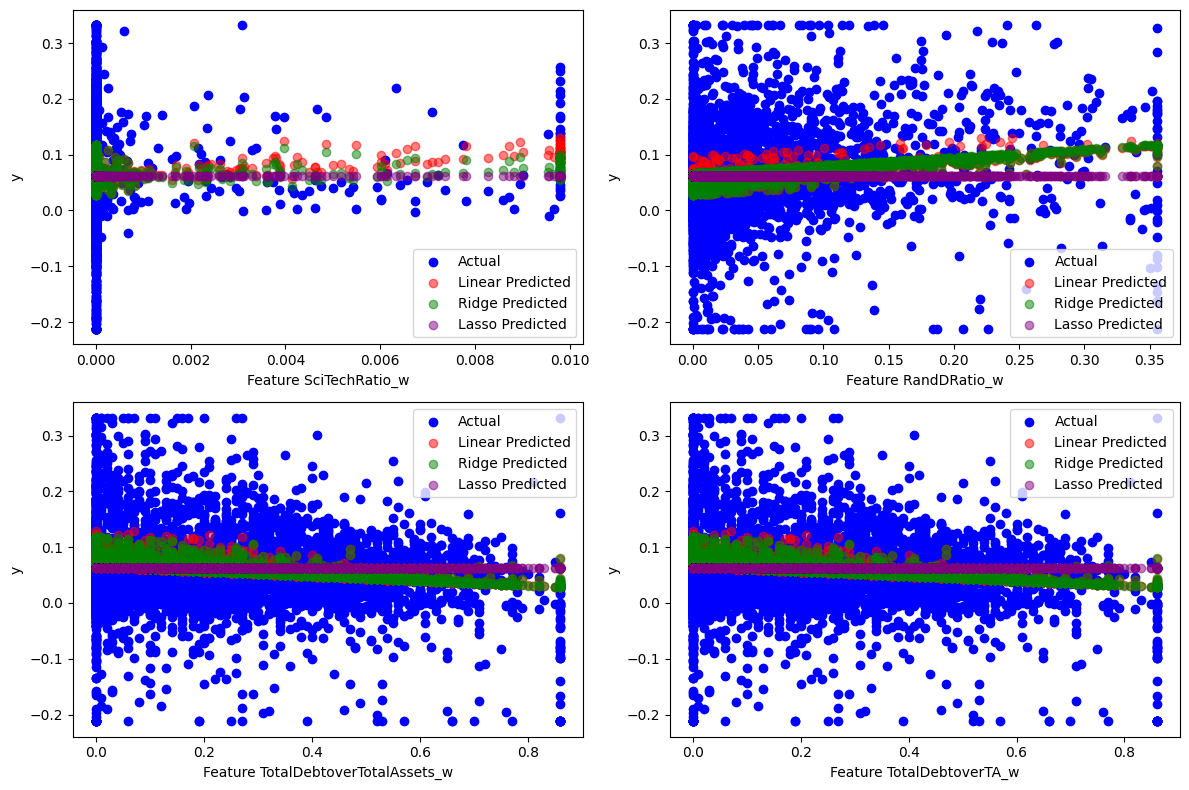

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_linear, color='red', label='Linear Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

In [36]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(mse_svr,r2_svr)

h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


0.006151792814298832 0.038012574667844024


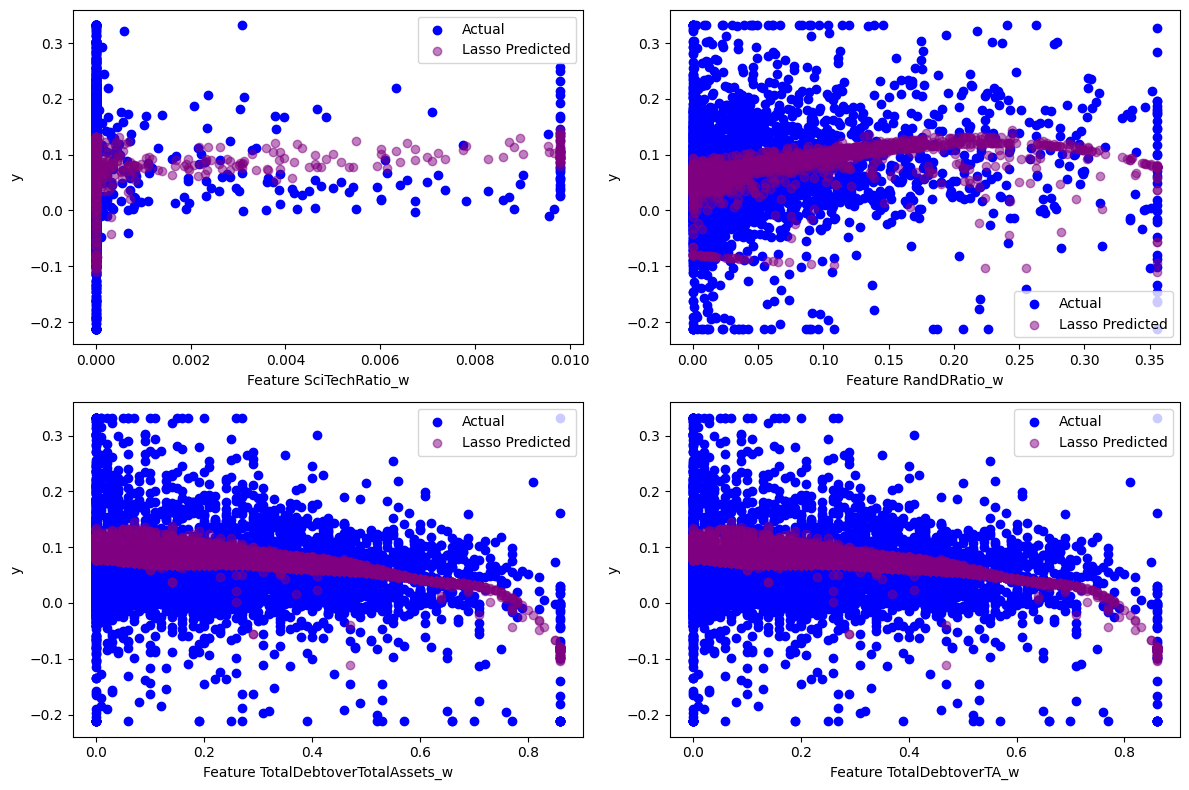

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_svr, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
h:\My Drive\UII_Project\.conda\lib\site-packages\sklearn\base.py:493: UserWarning: X d

Linear Regression - Mean Squared Error: 0.006100667336357882, R^2 Score: 0.046007328128814806
Ridge Regression - Mean Squared Error: 0.006107442130444736, R^2 Score: 0.04494791879603954
Lasso Regression - Mean Squared Error: 0.006398823287273155, R^2 Score: -0.000616848631783018
Elastic Net Regression - Mean Squared Error: 0.006398823287273155, R^2 Score: -0.000616848631783018
Polynomial Regression - Mean Squared Error: 0.005944422405447347, R^2 Score: 0.07044015012803184
Bayesian Ridge Regression - Mean Squared Error: 0.006100150242394486, R^2 Score: 0.04608818876660259
SGD Regression - Mean Squared Error: 0.006176045551935216, R^2 Score: 0.03422004957144409
PCR - Mean Squared Error: 0.006100667336357884, R^2 Score: 0.04600732812881447
PLS - Mean Squared Error: 1.1428813900721735e+25, R^2 Score: -1.7871823045472266e+27


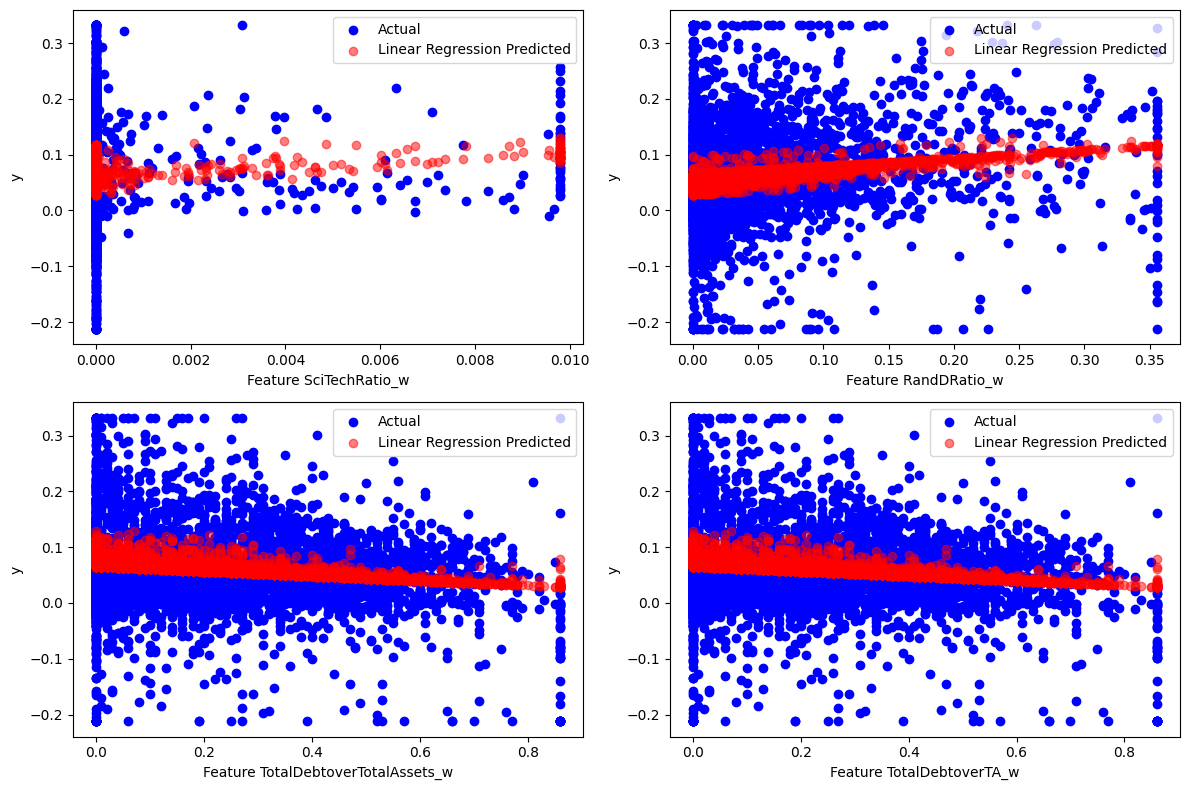

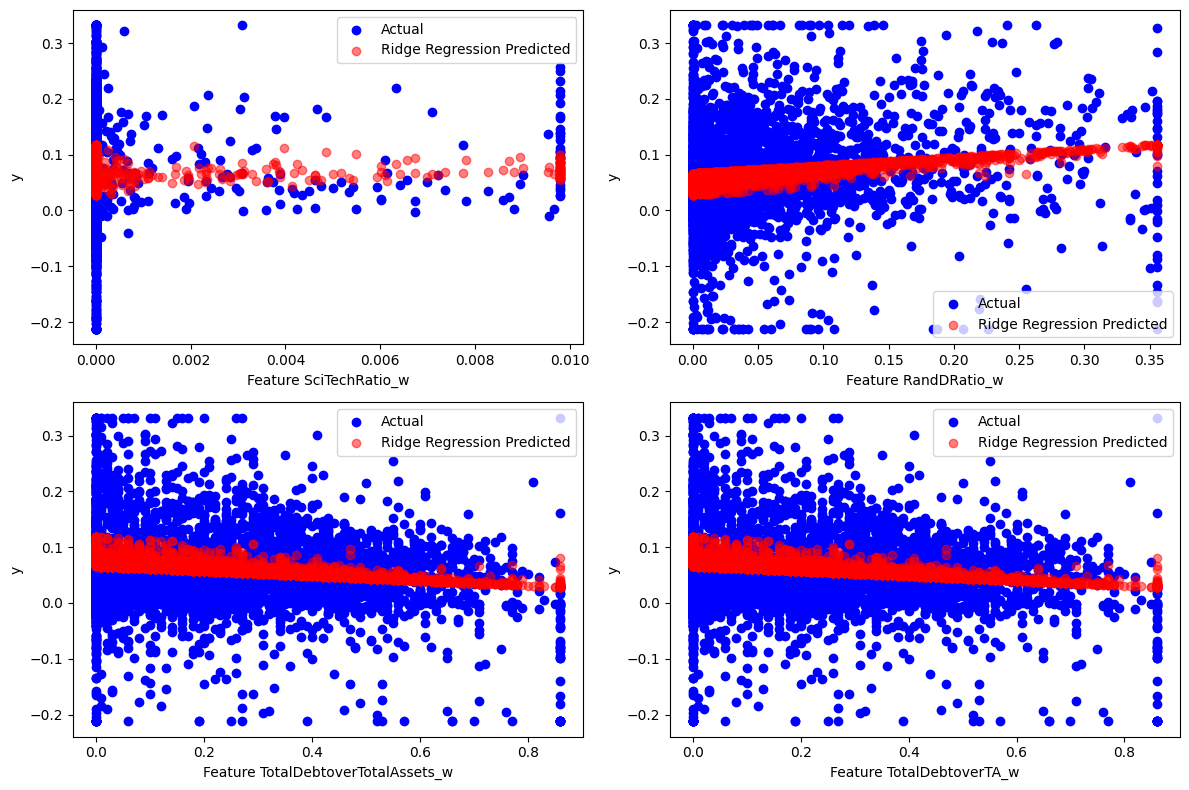

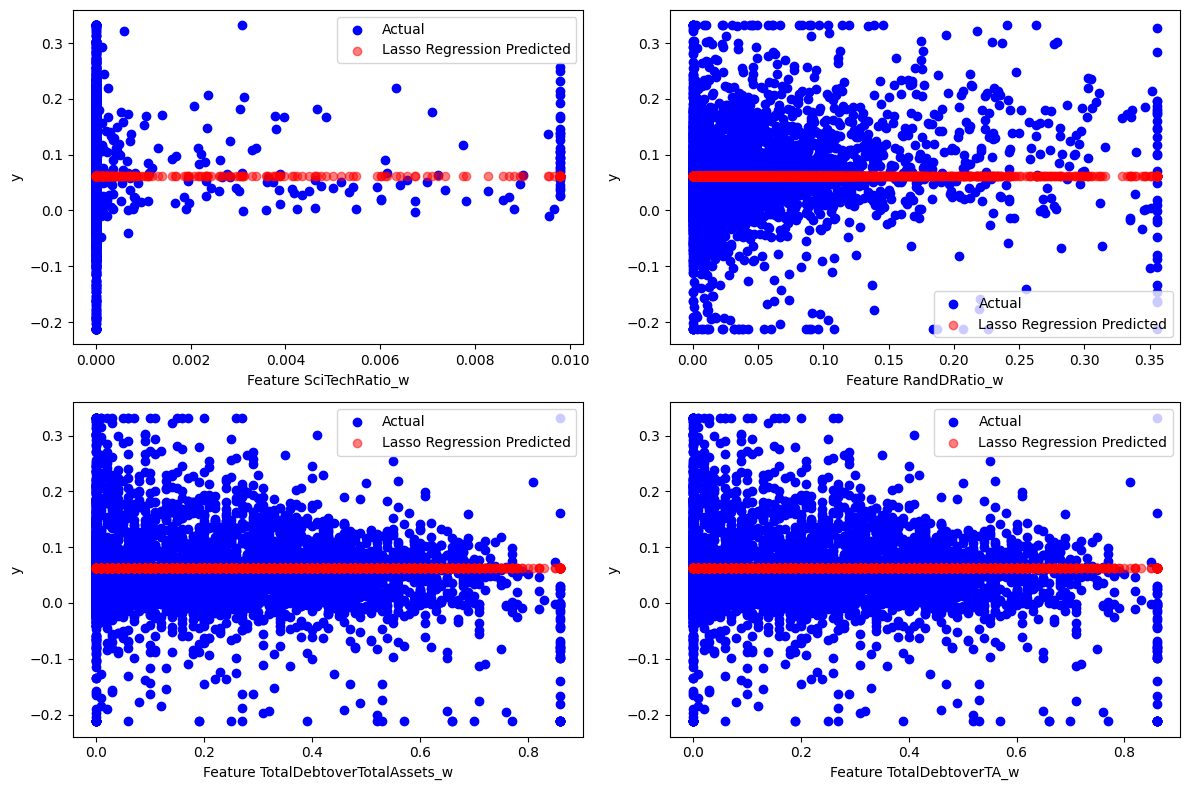

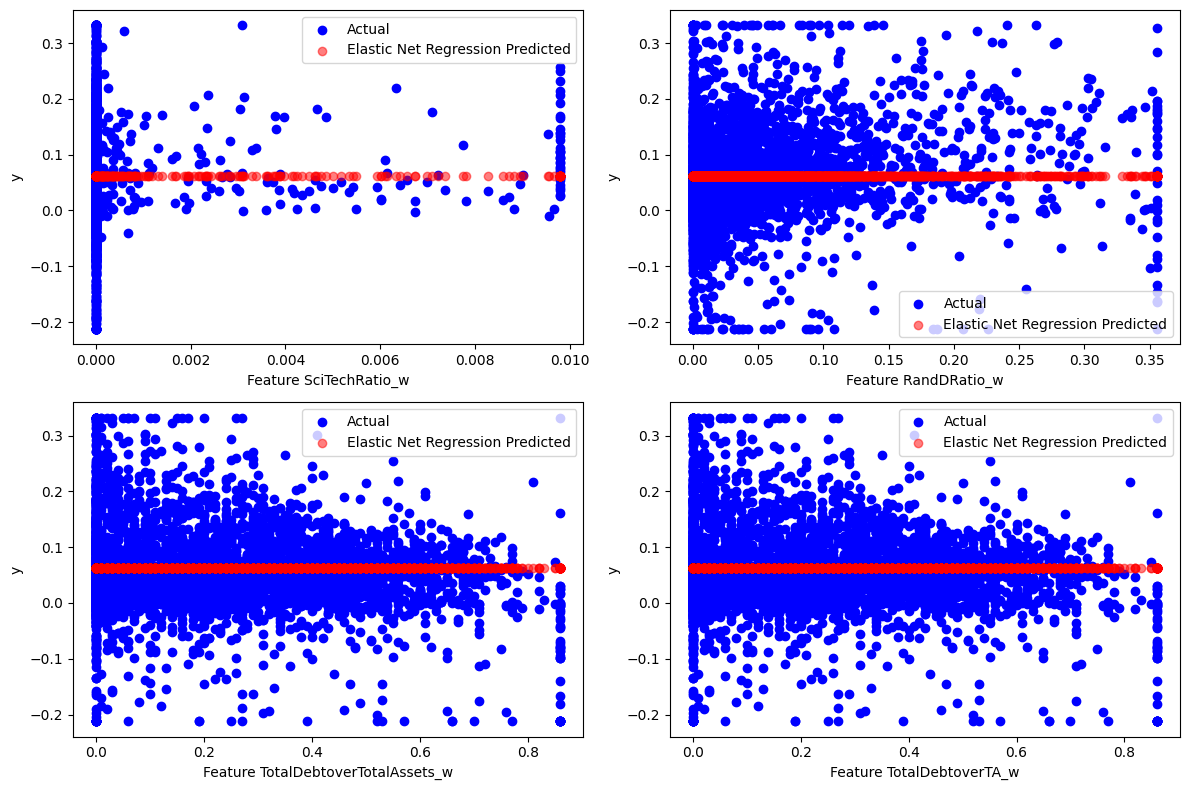

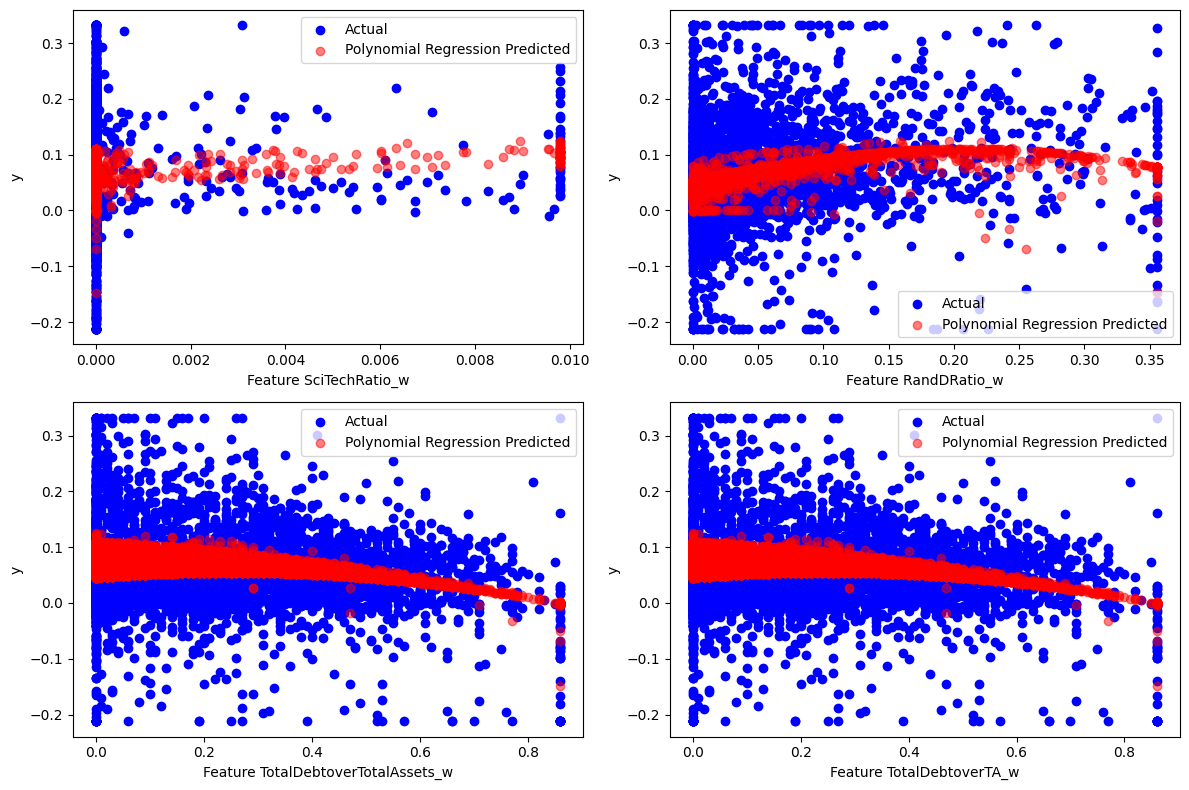

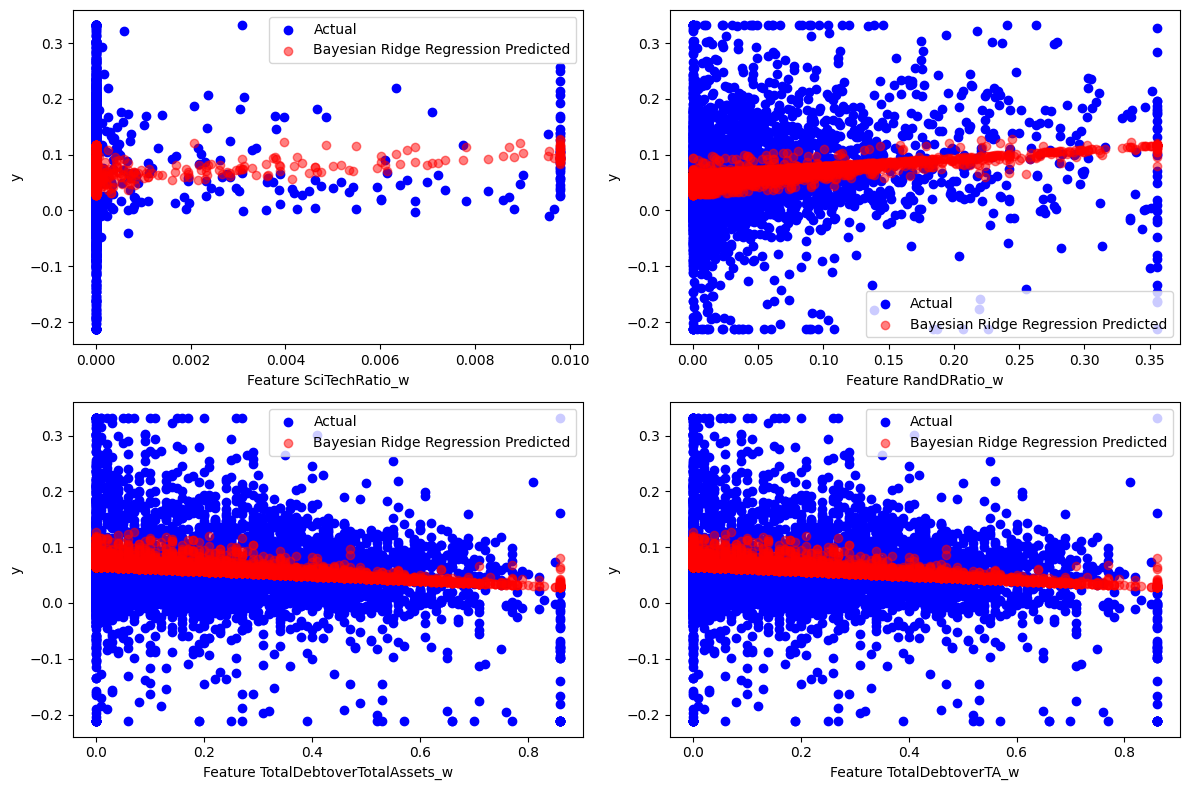

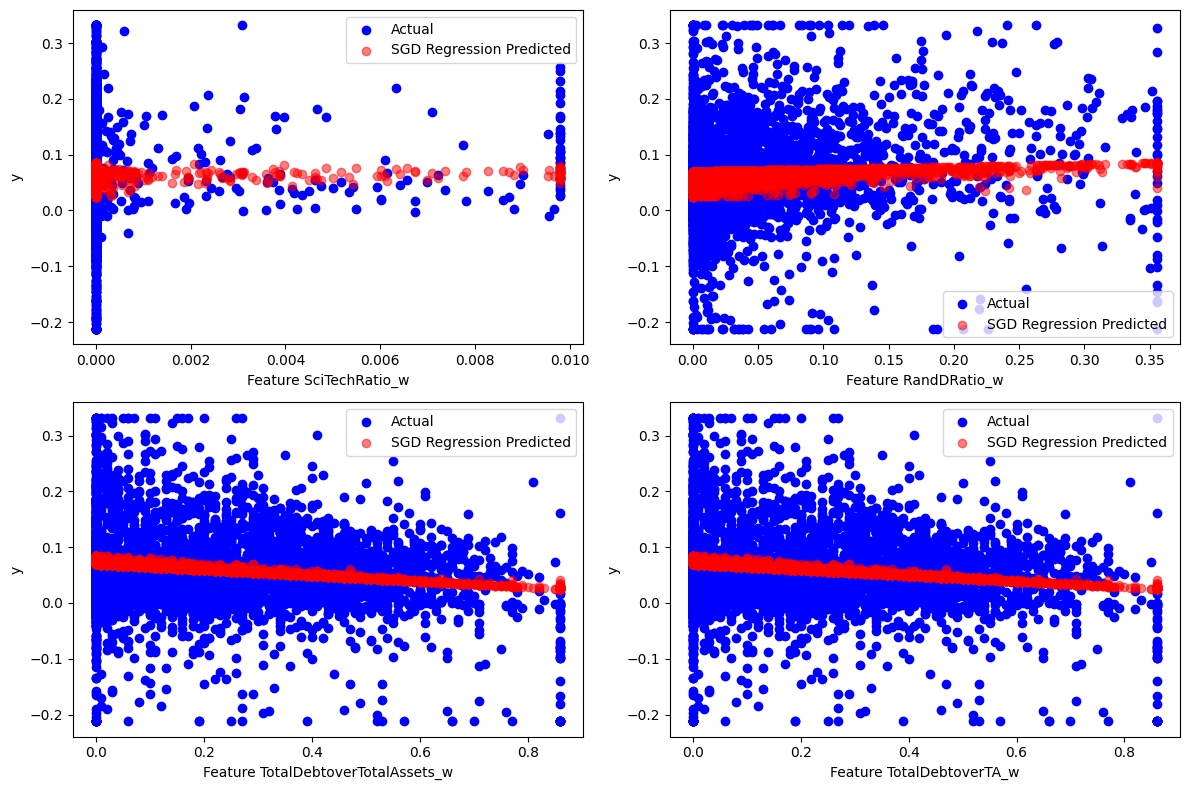

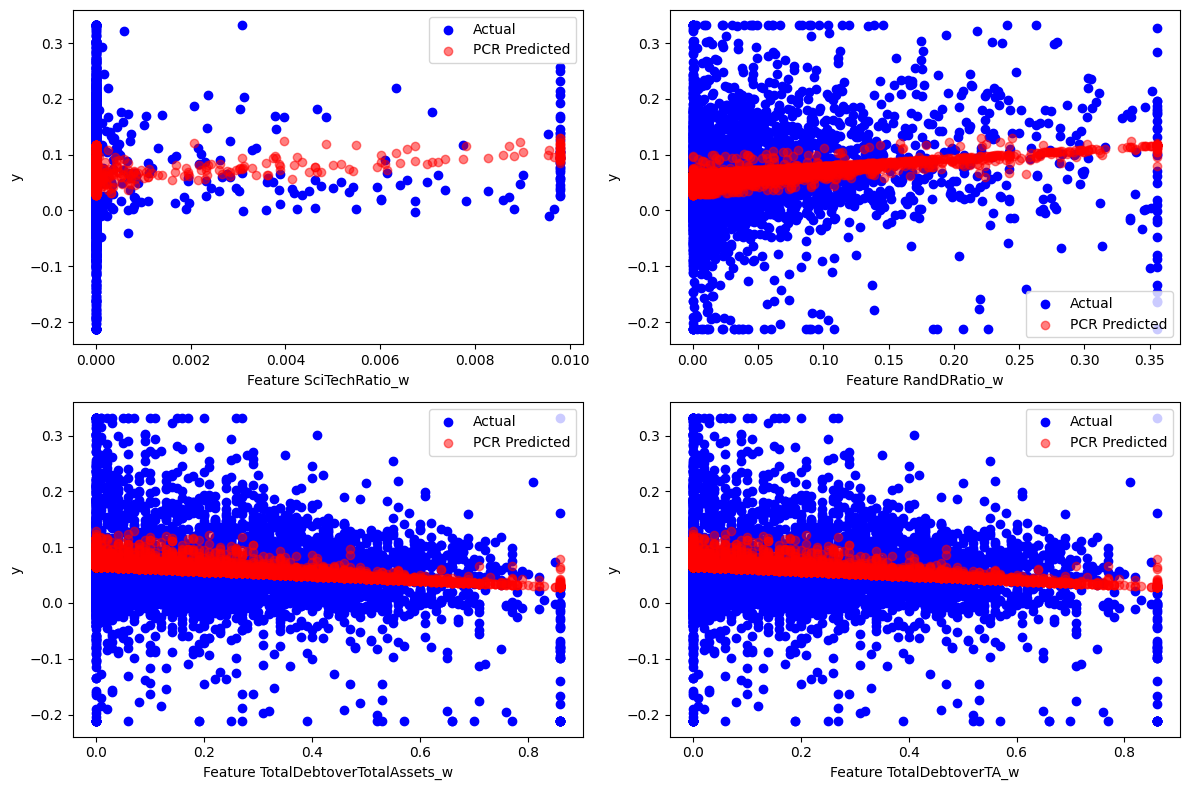

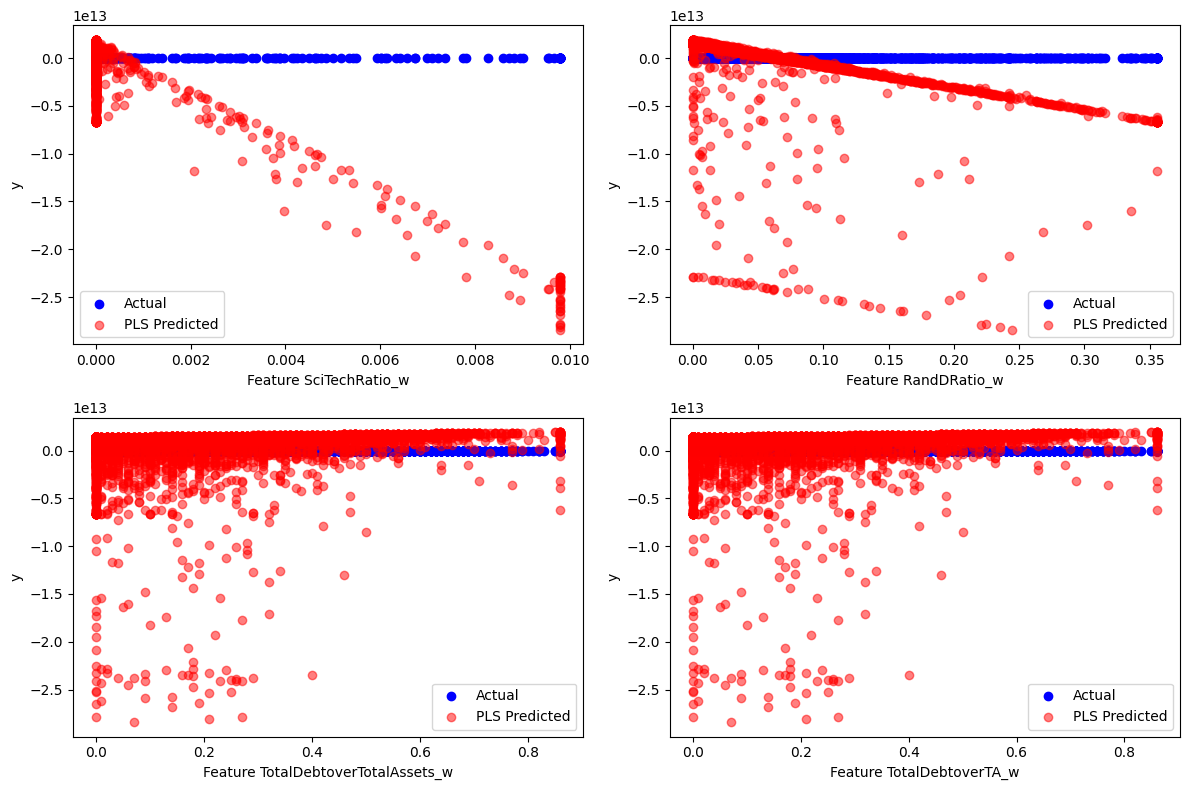

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử bạn đã có X_train, X_test, y_train, y_test
# X_train, X_test, y_train, y_test = ...

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly, LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

# Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_br = bayesian_ridge.predict(X_test)

# Stochastic Gradient Descent Regression
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# Principal Component Regression
pca = PCA(n_components=4)
pca_reg = make_pipeline(pca, LinearRegression())
pca_reg.fit(X_train, y_train)
y_pred_pca = pca_reg.predict(X_test)

# Partial Least Squares Regression
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)
y_pred_pls = pls.predict(X_test)

# Calculate Metrics
models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'Elastic Net Regression': y_pred_en,
    'Polynomial Regression': y_pred_poly,
    'Bayesian Ridge Regression': y_pred_br,
    'SGD Regression': y_pred_sgd,
    'PCR': y_pred_pca,
    'PLS': y_pred_pls
}

# Print MSE and R^2 for all models
for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

def show_result(y,name):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    for i in range(4):
        row, col = divmod(i, 2)
        axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
        axs[row, col].scatter(X_test[:, i], y, color='red', label=f'{name} Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_en, color='yellow', label='Elastic Net Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_poly, color='orange', label='Polynomial Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_br, color='gray', label='Bayesian Ridge Regression Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_sgd, color='pink', label='SGD Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_pca, color='brown', label='PCR Predicted', alpha=0.5)
        # axs[row, col].scatter(X_test[:, i], y_pred_pls, color='black', label='PLS Predicted', alpha=0.5)
        axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
        axs[row, col].set_ylabel('y')
        axs[row, col].legend()

    plt.tight_layout()
    plt.show()    

# # Plotting
# fig, axs = plt.subplots(3, 3, figsize=(18, 12))
# fig.suptitle('Comparison of Regression Models', fontsize=16)

# for i, (name, y_pred) in enumerate(models.items()):
#     row, col = divmod(i, 3)
#     axs[row, col].scatter(X_test[:, 0], y_test, color='blue', label='Actual')
#     axs[row, col].scatter(X_test[:, 0], y_pred, label=f'{name} Predicted', alpha=0.5)
#     axs[row, col].set_xlabel('Feature 0')
#     axs[row, col].set_ylabel('y')
#     axs[row, col].legend()
#     axs[row, col].set_title(name)

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()
for name,y_pred in models.items():
    show_result(y_pred,name)

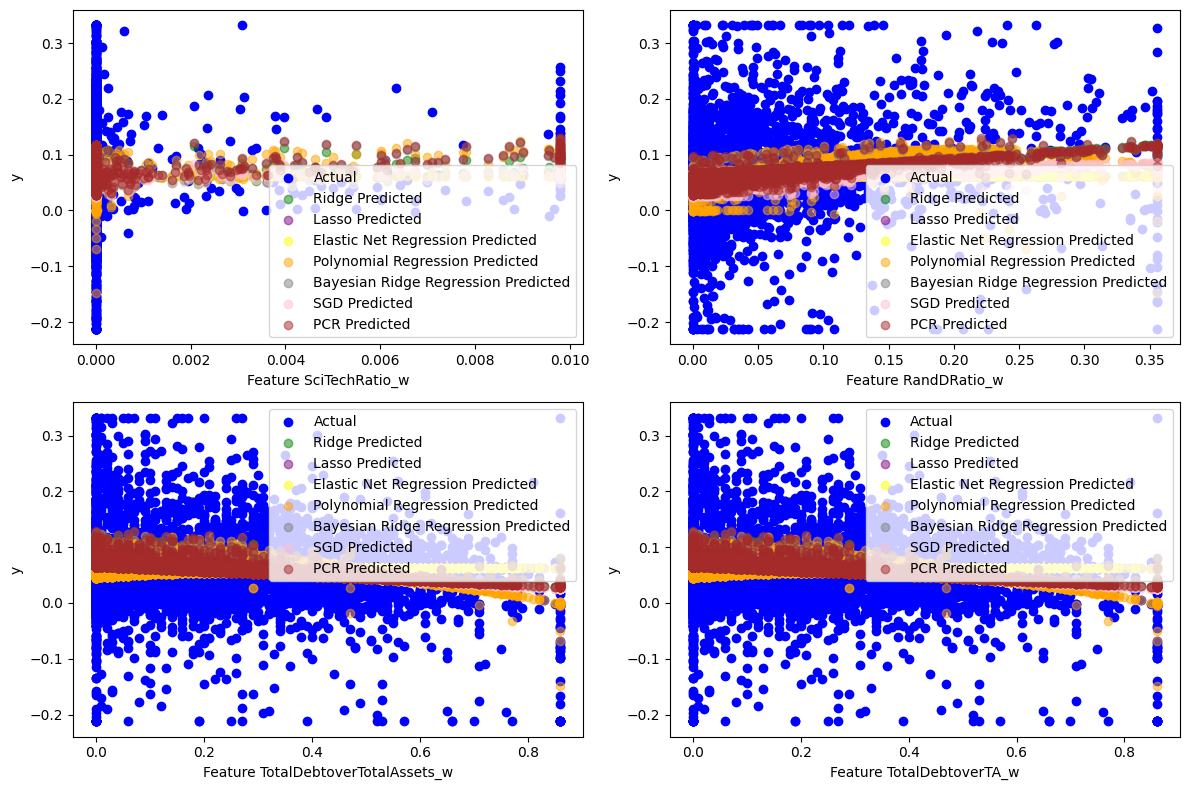

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(4):
    row, col = divmod(i, 2)
    axs[row, col].scatter(X_test[:, i], y_test, color='blue', label='Actual')
    axs[row, col].scatter(X_test[:, i], y_pred_ridge, color='green', label='Ridge Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_lasso, color='purple', label='Lasso Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_en, color='yellow', label='Elastic Net Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_poly, color='orange', label='Polynomial Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_br, color='gray', label='Bayesian Ridge Regression Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_sgd, color='pink', label='SGD Predicted', alpha=0.5)
    axs[row, col].scatter(X_test[:, i], y_pred_pca, color='brown', label='PCR Predicted', alpha=0.5)
    # axs[row, col].scatter(X_test[:, i], y_pred_pls, color='black', label='PLS Predicted', alpha=0.5)
    axs[row, col].set_xlabel(f'Feature {X.columns[i]}')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()

plt.tight_layout()
plt.show()    

In [42]:
import plotly.express as px
import pandas as pd

# Giả sử bạn đã có X_train, X_test, y_train, y_test dưới dạng DataFrame từ pandas
# X_train, X_test, y_train, y_test = ...

# Huấn luyện các mô hình
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)
# y_pred_linear = linear_reg.predict(X_test)
X_test = pd.DataFrame(X_test)

# Tạo DataFrame cho kết quả
results = X_test.copy()
y_test = pd.Series(y_test)

results['y_test'] = y_test
results['y_pred_linear'] = y_pred_linear

# Sử dụng Plotly để vẽ biểu đồ 3D
fig = px.scatter_3d(results, x=results.columns[0], y=results.columns[1], z=results.columns[2],
                    color='y_test', size='y_pred_linear', title='3D Scatter Plot with y_test and y_pred_linear',
                    labels={'color': 'y_test', 'size': 'y_pred_linear'})


# Cập nhật layout để hiển thị legend và bỏ đi các chỉ số phía dưới
fig.update_layout(
    legend=dict(title="Legend"),
    # margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis=dict(title='Feature 1', tickvals=[]),  # Thay đổi 'Feature 1' bằng tên của cột thực sự
        yaxis=dict(title='Feature 2', tickvals=[]),  # Thay đổi 'Feature 2' bằng tên của cột thực sự
        zaxis=dict(title='Feature 3', tickvals=[])   # Thay đổi 'Feature 3' bằng tên của cột thực sự
    )
)

fig.show()

In [43]:
y_test.isnull().sum()

0